# Примеры к лекции 10. Окна в цифровом спектральном анализе методом ДПФ.
Лекции по курсу "Дискретные преобразования сигналов", 3 курс ФРКТ МФТИ 

In [1]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
from scipy import signal
import scipy.io.wavfile

In [2]:
# Если используете Google Colab, то установите backend inline
%matplotlib inline

In [3]:
# Если используете Jupyter, то установите backend notebook
%matplotlib notebook

## Распознование сигнала с помощью ДПФ

Определим ДПФ сигнала из $N=64$ точек 
$$x[k] = \sin \left(2\pi  \dfrac{12}{N} k\right) + 2 \sin \left(2\pi  \dfrac{18}{N} k +\dfrac{\pi}{3}\right)$$

In [4]:
N=64
k=np.arange(N)
x=np.sin(2*np.pi*k*12/N)+2*np.sin(2*np.pi*k*18/N+np.pi/3)

В теоретической части работы рассматривался пример задачи спектрального анализа по обнаружению и оцениванию параметров сигнала. Пусть обрабатываемая последовательность имеет вид
$$x[k]=\sum\limits_{m=1}^{M}{{{A}_{m}}}\sin (2\pi \frac{m}{N}k+{{\varphi }_{m}}),\quad k=0,\ 1,\ 2,\ \ldots ,\ N-1,$$
где ${{A}_{m}}$ и ${{\varphi }_{m}}$ – неизвестные заранее амплитуды и фазы гармонических составляющих; $m$– неизвестные заранее целые числа, определяющие нормированные частоты ${{\nu }_{m}}=m/N$ гармонических составляющих, которые совпадают с бинами ДПФ. Для определения ${{A}_{m}}$ и ${{\varphi }_{m}}$ в этом случае достаточно вычислить ДПФ последовательности: 
	$$\tilde{X}[n]=\frac{1}{N}\sum\limits_{k=0}^{N-1}{x[k]}{{e}^{-j\frac{2\pi }{N}nk}}.$$
Неизвестные амплитуды и фазы определяются как
${{A}_{m}}=2\left| \tilde{X}[m] \right|;\quad {{\varphi }_{m}}=\arg \tilde{X}[m]+\pi /2,\ \ m\in \left[ 0,\ \frac{N}{2}-1 \right]$


Для расчетов удобно сразу взять формулу ДПФ с нормировкой на число отсчетов:

In [5]:
Xn=np.fft.fft(x)/N

<IPython.core.display.Javascript object>


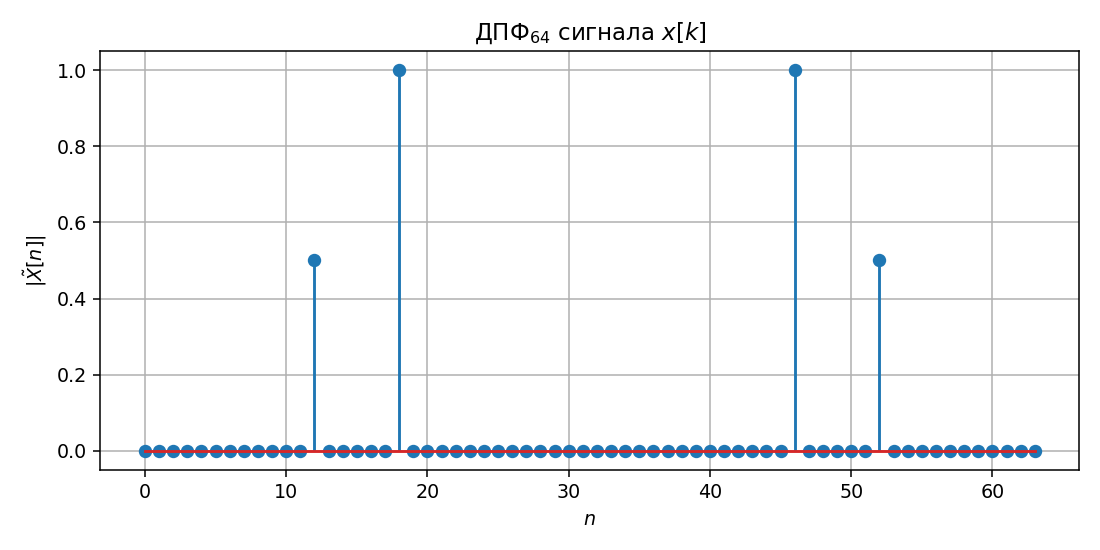

In [6]:
plt.figure(figsize=[8, 4])
plt.title("ДПФ$_{%i}$ сигнала $x[k]$" %N)
plt.stem(np.arange(Xn.size), abs(Xn))
plt.ylabel("$|\\tilde{X}[n]|$")
plt.xlabel("$n$")
plt.tight_layout()
plt.grid()
plt.show()

На левой половине периода ненулевыми являются отсчеты ДПФ $n=12$ и $n=18$.

$$x[k]=A_{12} \sin \left(2\pi \dfrac{12}{64}k+{{\varphi }_{12}} \right) + A_{18} \sin \left(2\pi \dfrac{18}{64}k+{{\varphi }_{18}} \right),\quad k=0,\ 1,\ 2,\ \ldots ,\ 63.$$

Остается опредлить неизвестные амплитуды и фазы $A_{12}$, $A_{18}$, ${\varphi }_{12}$, ${\varphi }_{18}$. 

$A_{12}$

In [7]:
2*abs(Xn[12])

1.0000000000000007

$A_{18}$

In [8]:
2*abs(Xn[18])

1.999999999999999

${\varphi }_{12}$

In [9]:
phi_12 = np.angle(Xn[12])+(np.pi/2)
phi_12

-1.5543122344752192e-15

${\varphi }_{18}$

In [10]:
phi_18 = np.angle(Xn[18])+(np.pi/2)
phi_18

1.0471975511965972

${\varphi }_{18}$ сооставляет $1/3$ от $\pi$.

In [11]:
phi_18/np.pi

0.33333333333333315

Оценка сигнала

$$x[k] = \sin \left(2\pi  \dfrac{12}{N} k\right) + 2 \sin \left(2\pi  \dfrac{18}{N} k +\dfrac{\pi}{3}\right)$$

## Оконные функции

`scipy.signal.get_window(window, Nx, fftbins=True)` Возвращает отсчеты оконной функции заданного типа и длины. 

**Parameters:**

`window` *string, float, or tuple* Тип оконной функции. 
* ***string***  Если окно непараметрическое (например, `boxcar`, `blackman`, `hamming`, `hann`, `bartlett`, `flattop`), то `window` — название окна (строка).

Название окна | Прямоугольное| Блэкмана|Хемминга| Ханна| Бартлета | С плоской вершиной
:----:  | :----:  | :----:    | :----:  | :----:| :----:    |  :----:   
***string*** | `boxcar`| `blackman`|`hamming`| `hann`| `bartlett`| `flattop`


* ***tuple*** Если окно параметрическое, то окно задается кортежем, где нулевой элемент — название окна (строка), а последующие элементы - параметры окна. Например, `('chebwin', 13)` — окно Чебышёва с уровнем боковых лепестков 13 дБ относительно главного, `('kaiser', 5)` — окно Кайзера с параметром $\beta=5$. 
Название окна | Кайзера| Чебышёва |
:----:  | :----:  | :----:    |
 ***tuple*** | `(kaiser, beta)` | `(chebwin, attenuation)`|
* ***float***  Для случая окна Кайзера можно сразу указать значение $\beta$ в параметр `window`.  Запись `window = 5` эквивалентна `window = ('kaiser', 5)`






`Nx` *int* Длина окна. 

`fftbins` *bool, optional* Если параметр равен `True` (по умолчанию), то создается окно для ДПФ, если `False` — симметричное на интервале $[0, N_x-1]$ окно, используемое для синтеза КИХ-фильтров.


**Returns:**

`get_window` *ndarray* Одномерный массив отсчетов окна длины `Nx`.

<IPython.core.display.Javascript object>


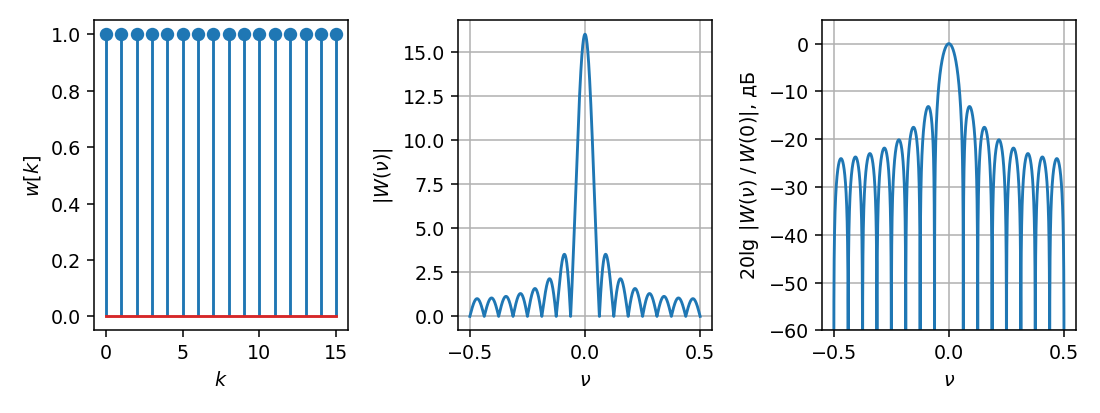

In [12]:
plt.figure(figsize=[8, 3], dpi=100)
Nfft=2**18

N = 16
w = signal.get_window('boxcar', N)
# w = signal.get_window(('kaiser', 5), N)
# w = signal.get_window(5, N)
# w = signal.get_window(('chebwin', 13), N, fftbins=False)
k = np.arange(N)
nu, W = np.linspace(-0.5, 0.5, num=Nfft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(w, Nfft))

plt.subplot(1, 3, 1)
plt.stem(k, w)
plt.xlabel('$k$')
plt.ylabel('$w[k]$')


plt.subplot(1, 3, 2)
k=np.arange(N)
plt.plot(nu, abs(W))
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')
plt.grid()


plt.subplot(1, 3, 3)
k=np.arange(N)
with np.errstate(divide='ignore'): # Отключаем RuntimeWarning
    plt.plot(nu, 20*np.log10(abs(W)/max(abs(W))))
plt.ylim(ymin=-60)
plt.grid()
plt.xlabel('$\\nu$')
plt.ylabel('$20 \lg \; |W(\\nu)\; / \;W(0)|$, дБ')
plt.tight_layout()

In [13]:
(0.02855*2)*16

0.9136

In [14]:
-17.7-(-12.5)

-5.199999999999999

## Взвешивание сигнала оконной функцией

### Пример 1. Различимость спектральных компонент.

Рассмотрим 64-точечный сигнал ($k=0,\;1,\;\dots, 63$)
$$x[k]=\sin\left( 2 \pi k \dfrac{11}{64}\right)+\sin\left( 2 \pi k \dfrac{13}{64}\right).$$
* Пример ниже показывает, что в случае прямоугольного окна (`w = signal.get_window('boxcar', N)`) спектральные компоненты вблизи частот $\nu_1={11}/{64}$ и  $\nu_2={13}/{64}$ различимы в ДВПФ. 
* Если выбрать окно Блэкмана(`w = signal.get_window('blackman', N)`) или окно Кайзера с параметром $\beta=8$ (`w = signal.get_window(('kaiser', 8), N)`), то эти спектральные компоненты неразличимы в ДВПФ.
* Если спектральные компоненты неразличимы в ДВПФ, то невозможно подобрать такую размерность ДПФ (`N_dft`), чтобы они оказались различимы в ДПФ. В противном случае это возможно. 

<IPython.core.display.Javascript object>


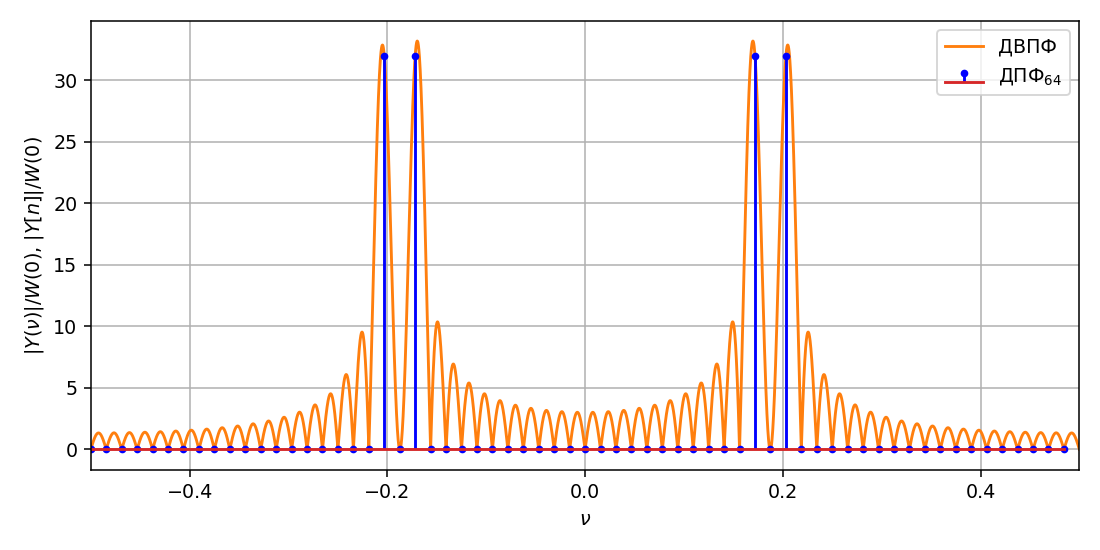

In [15]:
N=64
N_dtft=2**14
N_dft=64
k=np.arange(N)
x=np.sin(2*np.pi*k*11/N)+np.sin(2*np.pi*k*13/N)

w = signal.get_window('boxcar', N)
#w = signal.get_window('blackman', N)
# w = signal.get_window(('kaiser', 8), N)
# w = signal.get_window('flattop', N)
y = x * w # Взвешивание сигнала оконной функцией
W0 = sum(w)

nu_dtft, X_dtft = np.linspace(-0.5, 0.5, num=N_dtft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dtft))
nu_dft, X_dft = np.linspace(-0.5, 0.5, num=N_dft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dft))


plt.figure(figsize=[8, 4], dpi=100)
plt.plot(nu_dtft, abs(X_dtft), 'C1', label='ДВПФ')
plt.stem(nu_dft, abs(X_dft), linefmt='b', markerfmt='.b', label='ДПФ$_{%i}$' % N_dft)
plt.xlabel('$\\nu$')
plt.ylabel('$|Y(\\nu)|/W(0)$, $|Y[n]|/W(0)$')
plt.xlim([-0.5, 0.5])
plt.legend()
plt.grid()
plt.tight_layout()

### Пример 2. Амплитудная модуляция спектра.
Рассмотрим 32-точечный сигнал ($k=0,\;1,\;\dots, 31$)
$$x[k]=\cos\left( 2 \pi k \dfrac{9.5}{32}\right)=\frac{1}{2}\exp\left({j2 \pi k \dfrac{9.5}{32}}\right)+\frac{1}{2}\exp\left({-j2 \pi k \dfrac{9.5}{32}}\right)$$
* Пусть $y[k]=x[k]w[k]$, где $w[k]$ — некоторое окно. ДВПФ сигнала $y[k]$ 
$$Y(\nu)=\dfrac{1}{2} W\left(\nu- \dfrac{9.5}{32} \right)+\dfrac{1}{2} W\left(\nu+ \dfrac{9.5}{32} \right).$$
Чтобы высоты максимумов на графике ДВПФ соответствовали амплитудам гармоник, нужно нормировать ось ординат на $W(0)$.
* Если выбрать прямоугольное окно, `w = signal.get_window('boxcar', N)`, то оценки амплитуд, получаемые с помощью ДПФ$_{32}$, ,будут отличаться от истинных значений на $-3,92$ дБ (значение коэффициента паразитной амплитудной модуляции). 
* Результат можно исправить, дополняя сигнал нулевыми отсчетами и увеличивая размерность ДПФ. 
* Без изменения размерности ДПФ лучшего результата можно добиться с помощью окна с плоской вершиной `w = signal.get_window('flattop', N)`.
* В реальности часто частоты гармоник неизвестны. Поэтому для оценки амплитуд используются окна с низким коэффициентом паразитной амплитудной модуляции (например, flattop-окно).

<IPython.core.display.Javascript object>


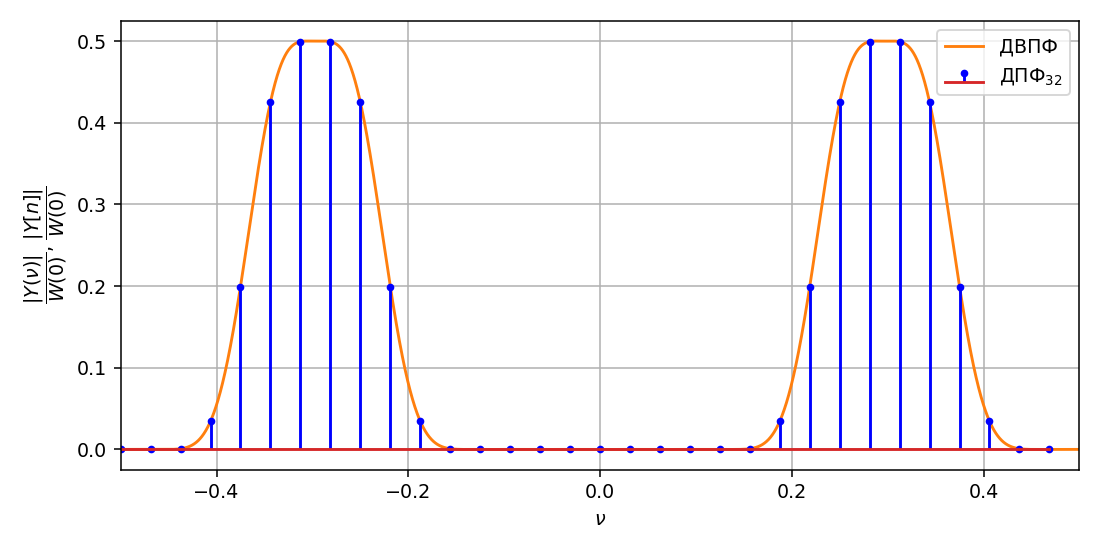

In [16]:
N=64
N_dtft=2**14
N=32
N_dft=32
k=np.arange(N)
x=np.cos(2*np.pi*9.5/N*k)

w = signal.get_window('boxcar', N)
# w = signal.get_window('blackman', N)
# w = signal.get_window(('kaiser', 8), N)
w = signal.get_window('flattop', N)
y = x * w
W0 = sum(w)


nu_dtft, X_dtft = np.linspace(-0.5, 0.5, num=N_dtft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dtft))
nu_dft, X_dft = np.linspace(-0.5, 0.5, num=N_dft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dft))


plt.figure(figsize=[8, 4], dpi=100)
plt.plot(nu_dtft, abs(X_dtft)/W0, 'C1', label='ДВПФ')
plt.stem(nu_dft, abs(X_dft)/W0, linefmt='b', markerfmt='.b', label='ДПФ$_{%i}$' % N_dft)
plt.xlabel('$\\nu$')
plt.ylabel('$\dfrac{|Y(\\nu)|}{W(0)}$, $\dfrac{|Y[n]|}{W(0)}$')
plt.xlim([-0.5, 0.5])
plt.legend()
plt.grid()
plt.tight_layout()